In [18]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, chi2
from matplotlib.patches import Ellipse

In [8]:
# Create dataframe with cement mixture data
data = {
    'Jenis adonan semen': range(1, 26),
    'X_1': [5.98, 6.00, 5.90, 5.88, 5.80, 5.82, 5.86, 5.84, 5.86, 5.96,
            6.42, 5.96, 5.92, 6.00, 5.92, 5.92, 5.66, 5.56, 5.70, 5.38,
            5.58, 5.60, 5.58, 5.54, 5.80],
    'X_2': [21.60, 21.80, 21.38, 21.86, 21.20, 21.90, 21.60, 21.32, 21.46, 21.68,
            21.86, 21.14, 21.18, 21.08, 21.08, 21.26, 20.80, 20.86, 20.88, 20.82,
            20.84, 20.96, 20.88, 20.82, 20.90]
}
df = pd.DataFrame(data)

In [10]:
df

,Jenis adonan semen,X_1,X_2
0,1,5.98,21.60
1,2,6.00,21.80
2,3,5.90,21.38
3,4,5.88,21.86
4,5,5.80,21.20
5,6,5.82,21.90
6,7,5.86,21.60
7,8,5.84,21.32
8,9,5.86,21.46
9,10,5.96,21.68


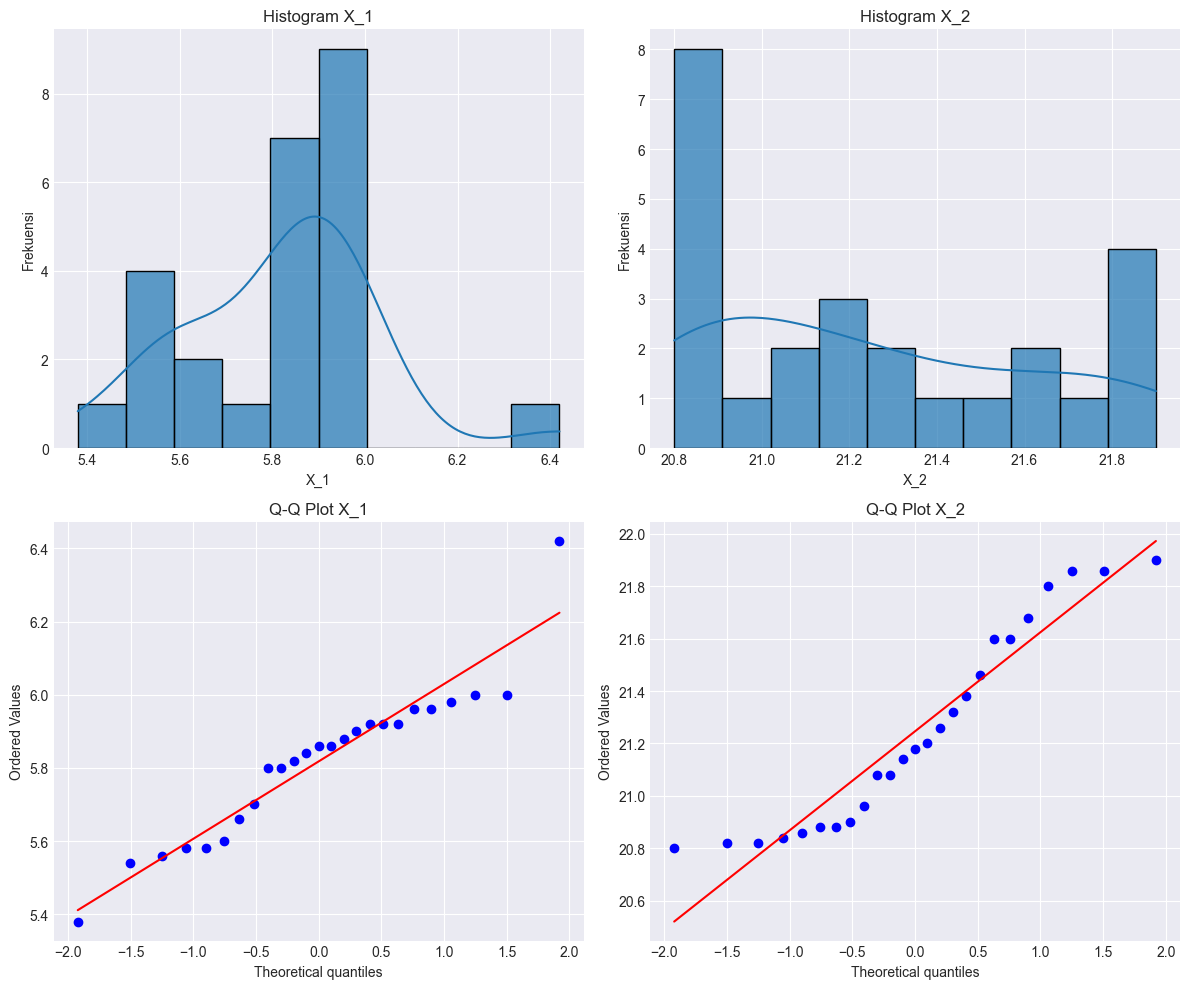

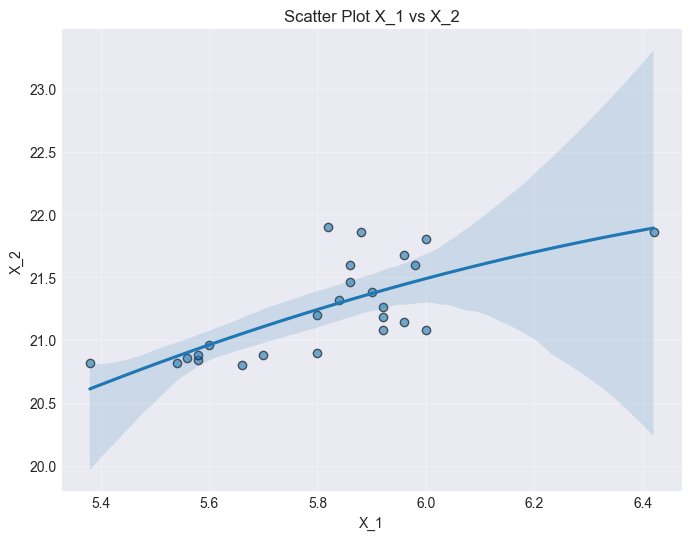

Uji Normalitas Shapiro-Wilk:
--------------------------------------------------
X_1: Statistik = 0.9296, p-value = 0.0853
   → X_1 berdistribusi normal (p > 0.05)

X_2: Statistik = 0.8969, p-value = 0.0157
   → X_2 tidak berdistribusi normal (p < 0.05)


In [14]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Histogram untuk X_1
sns.histplot(df['X_1'], bins=10, edgecolor='black', alpha=0.7, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram X_1')
axes[0, 0].set_xlabel('X_1')
axes[0, 0].set_ylabel('Frekuensi')

# 2. Histogram untuk X_2
sns.histplot(df['X_2'], bins=10, edgecolor='black', alpha=0.7, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram X_2')
axes[0, 1].set_xlabel('X_2')
axes[0, 1].set_ylabel('Frekuensi')

# 3. Q-Q plot untuk X_1
stats.probplot(df['X_1'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot X_1')

# 4. Q-Q plot untuk X_2
stats.probplot(df['X_2'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot X_2')

plt.tight_layout()
plt.show()

# 5. Scatter plot untuk melihat hubungan bivariat
plt.figure(figsize=(8, 6))
sns.regplot(x='X_1', y='X_2', data=df, order=2 ,scatter_kws={'alpha':0.6, 'edgecolor':'black'})
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Scatter Plot X_1 vs X_2')
plt.grid(True, alpha=0.3)
plt.show()

# 6. Uji Shapiro-Wilk untuk masing-masing variabel
print("Uji Normalitas Shapiro-Wilk:")
print("-" * 50)
stat_x1, p_x1 = stats.shapiro(df['X_1'])
print(f"X_1: Statistik = {stat_x1:.4f}, p-value = {p_x1:.4f}")
if p_x1 > 0.05:
    print("   → X_1 berdistribusi normal (p > 0.05)")
else:
    print("   → X_1 tidak berdistribusi normal (p < 0.05)")

stat_x2, p_x2 = stats.shapiro(df['X_2'])
print(f"\nX_2: Statistik = {stat_x2:.4f}, p-value = {p_x2:.4f}")
if p_x2 > 0.05:
    print("   → X_2 berdistribusi normal (p > 0.05)")
else:
    print("   → X_2 tidak berdistribusi normal (p < 0.05)")

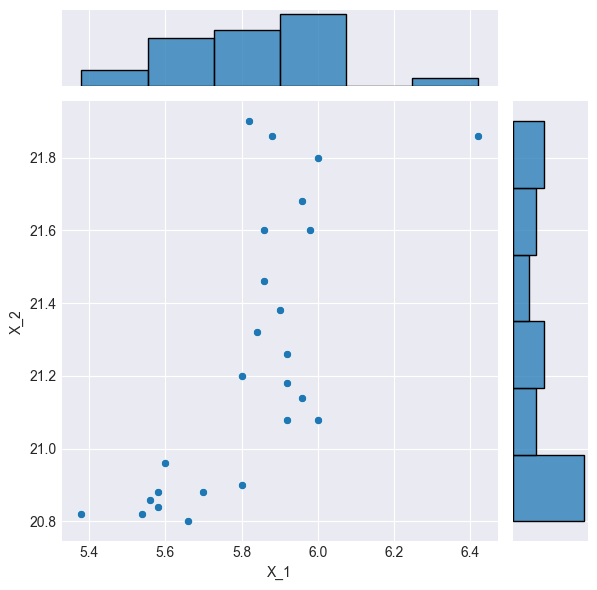

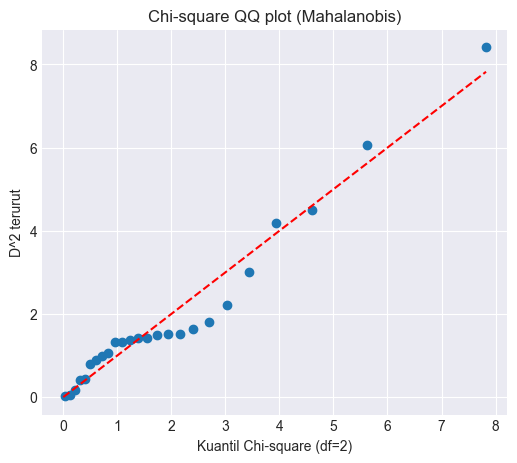

In [17]:
sns.jointplot(data=df, x='X_1', y='X_2', kind='scatter')

# df berisi kolom 'X_1','X_2'
X = df[['X_1','X_2']].to_numpy()
xbar = X.mean(axis=0)
S = np.cov(X, rowvar=False)
Sinv = np.linalg.inv(S)

# (d) Mahalanobis distance & chi-square QQ
D2 = np.array([(x - xbar) @ Sinv @ (x - xbar).T for x in X])
D2_sorted = np.sort(D2)
p = 2; n = len(df)
chi2_q = chi2.ppf((np.arange(1, n+1)-0.5)/n, df=p)

plt.figure(figsize=(6,5))
plt.scatter(chi2_q, D2_sorted)
plt.plot([0, chi2_q.max()], [0, chi2_q.max()], 'r--')
plt.xlabel('Kuantil Chi-square (df=2)')
plt.ylabel('D^2 terurut')
plt.title('Chi-square QQ plot (Mahalanobis)')
plt.show()

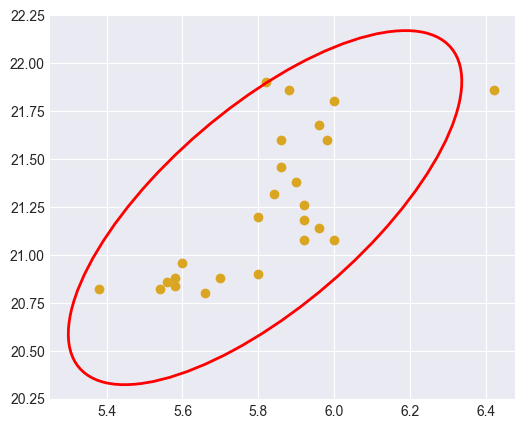

In [20]:
X = np.column_stack((df['X_1'], df['X_2']))

# Mean dan Covariance
mean = X.mean(axis=0)
cov = np.cov(X, rowvar=False)

# Eigen decomposition untuk menentukan orientasi ellipse
eigvals, eigvecs = np.linalg.eigh(cov)
order = eigvals.argsort()[::-1]
eigvals = eigvals[order]
eigvecs = eigvecs[:, order]

# Nilai Chi-square untuk confidence level 95%
chi2_val = chi2.ppf(0.95, df=2)

# Hitung panjang sumbu ellipse
width = 2 * np.sqrt(eigvals[0] * chi2_val)
height = 2 * np.sqrt(eigvals[1] * chi2_val)

# Arah rotasi ellipse
angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))

# Plot scatter dan ellipse
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], color='goldenrod', label='Data Points')
ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                  edgecolor='red', fc='none', lw=2, label='95% Confidence Ellipse')
plt.gca().add_patch(ellipse)


In [27]:
# Hitung mean dan covariance
mean = X.mean(axis=0)
S = np.cov(X, rowvar=False)
S_inv = np.linalg.inv(S)

# Hitung Mahalanobis Distance untuk tiap titik
D2 = np.array([(x - mean) @ S_inv @ (x - mean).T for x in X])

# Batas 95% Chi-square
threshold = chi2.ppf(0.95, df=2)

# Tabel hasil numerik
result = np.column_stack((df['X_1'], df['X_2'], D2, D2 <= threshold))
df_result = pd.DataFrame(result, columns=["X1","X2","D^2","Inside_95%"])
df_result['Inside_95%'] = df_result['Inside_95%'].map({1: 'Yes', 0: 'No'})


print("\nChi-square 95% Threshold = ", threshold)
print("Jumlah titik di luar ellipse:", np.sum(D2 > threshold))


Chi-square 95% Threshold =  5.991464547107979
Jumlah titik di luar ellipse: 2


In [28]:
df_result

,X1,X2,D^2,Inside_95%
0,5.98,21.60,0.898055,Yes
1,6.00,21.80,2.224966,Yes
2,5.90,21.38,0.163227,Yes
3,5.88,21.86,4.178187,Yes
4,5.80,21.20,0.015176,Yes
5,5.82,21.90,6.066153,No
6,5.86,21.60,1.327471,Yes
7,5.84,21.32,0.040366,Yes
8,5.86,21.46,0.405615,Yes
9,5.96,21.68,1.366240,Yes
